In [1]:
import pandas as pd
import numpy as np
import pickle
from scipy import stats
from gurobipy import *

In [2]:
input_file = pd.read_csv('input.csv')
input_file = input_file.set_index('institute')
output_file = pd.read_csv('output.csv')
output_file = output_file[['institute', 'weighted publication']]

z = np.abs(stats.zscore(output_file['weighted publication']))
non_outlier = list(set(list(output_file.index)) - set(list(np.where(z > 3)[0])))
input_file = input_file.iloc[non_outlier]
output_file = output_file.iloc[non_outlier]

input_ = dict()
for i, row in input_file.iterrows():
    cur = [[]]
    cur[0].append(row['structural hole (effective)'])
    cur[0].append(row['structural hole (local)'])
    input_[i] = cur
    
output_file = output_file.set_index('institute').to_dict()['weighted publication']

DMU, X = multidict(input_)
DMU, Y = multidict(output_file)

### CRS

In [3]:
E={}
OE=[]
I=2  # 兩項投入
O=1  # 一項產出
epsilon = 1e-6

for r in DMU:
    m=Model("CRS_model")
#     m.Params.DualReductions=0
    v,u={},{}

    for i in range(I):
        v[r,i]=m.addVar(vtype=GRB.CONTINUOUS,name="v_%s%d"%(r,i),lb=epsilon)
    
    for j in range(O):
        u[r,j]=m.addVar(vtype=GRB.CONTINUOUS,name="u_%s%d"%(r,j),lb=epsilon)
        
    m.update()
        
    m.setObjective(quicksum(u[r,j]*Y[r] for j in range(O)),GRB.MAXIMIZE)
    
    m.addConstr(quicksum(v[r,i]*X[r][i] for i in range(I))==1)
    for k in DMU:
        m.addConstr(quicksum(u[r,j]*Y[k] for j in range(O))-quicksum(v[r,i]*X[k][i] for i in range(I))<=0)
    
    m.optimize()
    
    E[r]="The efficiency of DMU %s:%0.3g"%(r,m.objVal)
    OE.append(m.objVal)
    
# for r in DMU:
#     print (E[r])

Academic license - for non-commercial use only - expires 2023-02-28
Using license file C:\Users\champ\gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xf4b4c334
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 4e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5238011e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds
Optimal objective  9.523801058e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Mode

Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 7e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5873016e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.587301587e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x99acc66b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1369 rows and 1 columns
Presolve time: 0.01s
Presolved: 145 rows, 2 columns, 290 nonzeros

Iteration    Objective       Primal Inf.   

Model fingerprint: 0xa5457751
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1400 rows and 1 columns
Presolve time: 0.00s
Presolved: 114 rows, 2 columns, 228 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.2727269e-02   6.590907e-02   0.000000e+00      0s
       1    5.8488755e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  5.848875491e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xa5457751
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1400 rows and 1 columns
Presolve 

Model fingerprint: 0x3b364440
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 8e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1489 rows and 1 columns
Presolve time: 0.00s
Presolved: 25 rows, 2 columns, 50 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.7272727e-01   6.590908e-02   0.000000e+00      0s
       1    2.6280991e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  2.628099052e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xf93af1e8
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e+00, 2e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1462 rows and 1 columns
Presolve ti

Model fingerprint: 0x5090ebab
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e+00, 3e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1500 rows and 1 columns
Presolve time: 0.00s
Presolved: 14 rows, 2 columns, 28 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.6406926e-01   1.569263e-02   0.000000e+00      0s
       1    2.6142986e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  2.614298575e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x77468c88
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e+00, 3e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1493 rows and 1 columns
Presolve ti

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.7857127e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.785712698e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x7ce65b70
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.9523757e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  5.952375661e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processor

Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x42cb1de5
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 7e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1407 rows and 1 columns
Presolve time: 0.01s
Presolved: 107 rows, 2 columns, 214 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.8787868e-02   2.196968e-02   0.000000e+00      0s
       1    6.4296078e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  6.429607770e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xda026a10
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+

Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.9523757e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  5.952375661e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x3a019629
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 4e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5238082e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  9.523808201e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 

Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e+00, 4e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.3809524e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  2.380952377e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xab804918
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual I

Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1904751e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.190475132e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xb0068a09
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 8e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1503 rows and 1 columns
Presolve time: 0.00s
Presolved: 11 rows, 2 columns, 22 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0054860e-01   4.676707e-01   0.000000e+00      0s
       2    1.9534651e-01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objec


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.6670593e-02   1.829002e+01   0.000000e+00      0s
       2    5.0635574e-02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  5.063557410e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x06ea0f28
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [6e-01, 6e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1485 rows and 1 columns
Presolve time: 0.00s
Presolved: 29 rows, 2 columns, 58 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0606060e-01   6.590908e-02   0.000000e+00      0s
       1    1.9768304e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal 


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3749995e-01   1.235794e-02   0.000000e+00      0s
       1    2.9363166e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  2.936316556e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xbe8aa5a8
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e+00, 4e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.01s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.3944930e-01   4.103180e+00   0.000000e+00      0s
       2    2.0947809e-01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optima

       0    1.1334119e-01   1.829002e+01   0.000000e+00      0s
       2    1.0127115e-01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  1.012711482e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x12d3fffc
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.00s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.6670593e-02   1.829002e+01   0.000000e+00      0s
       2    5.0635574e-02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  5.063557410e-02
Gurobi Optimizer version 9.1.2 build

Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 8e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.7857140e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.785714038e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xfadf53a1
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual I


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.5454543e-01   6.590907e-02   0.000000e+00      0s
       1    3.4246326e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  3.424632648e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x67cc2085
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.00s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.0299813e-02   1.748615e+01   0.000000e+00      0s
       2    8.3119208e-02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optima

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x21c0d69a
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e+00, 2e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.4801586e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  2.480158570e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xd146b4f3
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e+00, 5e

Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 8e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1459 rows and 1 columns
Presolve time: 0.00s
Presolved: 55 rows, 2 columns, 110 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.7272727e-01   6.590908e-02   0.000000e+00      0s
       1    2.4792474e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  2.479247371e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x7a65e5b1
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1395 rows and 1 columns
Presolve time: 0.00s
Presolved: 119 rows

  Objective range  [4e-01, 4e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5238011e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  9.523801058e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xeb85b8ef
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e+00, 4e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1496 rows and 1 columns
Presolve time: 0.01s
Presolved: 18 rows, 2 columns, 36 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4365459e-01   6.442229e-0

  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.8046104e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.804610364e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x0f3c691c
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e+00, 2e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1495 rows and 1 columns
Presolve time: 0.01s
Presolved: 19 rows, 2 columns, 38 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.3965744e-01   1.432805e-02   0.000000e+00      0s
       1    1.3655480e-01   0.000000e+00   

  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1470 rows and 1 columns
Presolve time: 0.01s
Presolved: 44 rows, 2 columns, 88 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.2727272e-02   6.590908e-02   0.000000e+00      0s
       1    6.7910639e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  6.791063874e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xec8e59cb
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1469 rows and 1 columns
Presolve time: 0.00s
Presolved: 45 rows, 2 columns, 90 nonzeros

Iteration    Objective       Prima

  Objective range  [7e-01, 7e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5873002e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds
Optimal objective  1.587300176e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x37633df3
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.9365009e-02   0.000000e+00   0


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.5764675e-02   1.842549e+01   0.000000e+00      0s
       2    6.4696411e-02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  6.469641065e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xfaa26472
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 7e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5873002e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.587300176e-01
Gurobi Optimizer version 9.1.2 build v9.1.

Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xcf0a9aed
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e+00, 3e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1459 rows and 1 columns
Presolve time: 0.01s
Presolved: 55 rows, 2 columns, 110 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.2943721e-01   1.569263e-02   0.000000e+00      0s
       1    2.0846765e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  2.084676500e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x45aae12f
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 4e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+0

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xb04e640b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1415 rows and 1 columns
Presolve time: 0.01s
Presolved: 99 rows, 2 columns, 198 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9999980e+01   2.626513e+03   0.000000e+00      0s
       3    3.5590670e-01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.01 seconds
Optimal objective  3.559066968e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xc62d9f3d
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective ra

  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5873014e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.587301367e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xa7c5d4bb
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 7e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.9365052e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal

       0    3.1008269e+00   7.290050e+00   0.000000e+00      0s
       3    3.0575879e-01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.01 seconds
Optimal objective  3.057587946e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x183fb1bf
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 4e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1501 rows and 1 columns
Presolve time: 0.00s
Presolved: 13 rows, 2 columns, 26 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4545455e-01   6.590908e-02   0.000000e+00      0s
       1    1.4468754e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  1.446875380e-01
Gurobi Optimizer version 9.1.2 build v


Solved in 2 iterations and 0.01 seconds
Optimal objective  1.428571429e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xf707dd25
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e+00, 2e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.2857105e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  4.285710476e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x89c0dfd9
Coefficient

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x826b9d25
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1476 rows and 1 columns
Presolve time: 0.01s
Presolved: 38 rows, 2 columns, 76 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5515151e-01   2.636362e-02   0.000000e+00      0s
       1    1.4605197e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  1.460519660e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x82749e6c
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective ran

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x01a204b3
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e+00, 2e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1497 rows and 1 columns
Presolve time: 0.01s
Presolved: 17 rows, 2 columns, 34 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.4658858e+00   1.906372e+01   0.000000e+00      0s
       4    2.9624080e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  2.962407995e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x7d15cfde
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective ran

  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1432 rows and 1 columns
Presolve time: 0.01s
Presolved: 82 rows, 2 columns, 164 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.4458857e-02   9.415569e-03   0.000000e+00      0s
       1    6.3806630e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  6.380663011e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x657ef758
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1387 rows and 1 columns
Presolve time: 0.00s
Presolved: 127 rows, 2 columns, 254 nonzeros

Iteration    Objective       Pr

Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.9523810e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  5.952380952e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x2935fe8b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 8e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1420 rows and 1 columns
Presolve time: 0.00s
Presolved: 94 rows, 2 columns, 188 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2987012e-01   2.824674e-02   0.000000e+00      0s
       1    1.0910930e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal obje

Model fingerprint: 0xc9534f43
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [6e-01, 6e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4285714e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.428571412e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xf21b31e5
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 4e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1433 rows and 1 columns
Presolve time: 0.00s
Presolved: 81 rows, 2 columns, 162 nonzeros

Iteration    O

  RHS range        [1e+00, 1e+00]
Presolve removed 1416 rows and 1 columns
Presolve time: 0.00s
Presolved: 98 rows, 2 columns, 196 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.4935062e-01   1.883115e-02   0.000000e+00      0s
       1    2.0789990e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  2.078998973e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x1a7a6be9
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 8e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+00   0.000000e+00  

Presolve time: 0.00s
Presolved: 17 rows, 2 columns, 34 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.7243122e+00   6.329196e+01   0.000000e+00      0s
       4    1.4062399e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  1.406239946e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xaae25daf
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e+00, 3e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1393 rows and 1 columns
Presolve time: 0.01s
Presolved: 121 rows, 2 columns, 242 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9431813e-01   1.235794e-02   0.000000e+00      0s
       1    1.5345289e-01   0.000000e+00   0.00


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2121212e-01   6.590908e-02   0.000000e+00      0s
       1    1.1410797e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  1.141079701e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x6cc2b5cb
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e+00, 2e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1498 rows and 1 columns
Presolve time: 0.00s
Presolved: 16 rows, 2 columns, 32 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.9783024e+00   2.202004e+01   0.000000e+00      0s
       3    3.7193599e-01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.01 seconds
Optimal 

Presolve time: 0.00s
Presolved: 45 rows, 2 columns, 90 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.5844153e-01   1.412336e-02   0.000000e+00      0s
       1    3.3338388e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  3.333838845e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x381bc95b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1904762e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objec

Optimal objective  9.523808201e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xfaa26472
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 7e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5873002e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.587300176e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x37633df3
Coefficient statistics:
  Matrix range     [1e-03, 1

  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 7e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5873002e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.587300176e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x37633df3
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0  

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x6fc7ea1c
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 8e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9047602e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.904760212e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x3cb77875
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range     


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.7893217e-01   1.569263e-02   0.000000e+00      0s
       1    1.7262124e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  1.726212410e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x0b775bad
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.00s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2802925e-01   1.652818e+01   0.000000e+00      0s
       2    1.2224628e-01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optima

  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.01s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.6670593e-02   1.829002e+01   0.000000e+00      0s
       2    5.0635574e-02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  5.063557410e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xbdce4a9c
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.01s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.6670593e-02   1.8290


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.7636668e+00   2.639308e+01   0.000000e+00      0s
       3    2.4028624e-01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.01 seconds
Optimal objective  2.402862410e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x8fa8a89c
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [6e-01, 6e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4285712e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.428571230e-01
Gurobi Optimizer version 9.1.2 build v9.1.

Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x6ea07450
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 4e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1411 rows and 1 columns
Presolve time: 0.01s
Presolved: 103 rows, 2 columns, 206 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.8275052e-02   2.534963e-02   0.000000e+00      0s
       1    4.7927832e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  4.792783181e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x88be6c25
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x955ebee6
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.01s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.4014627e-02   1.652818e+01   0.000000e+00      0s
       2    6.1123140e-02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  6.112314049e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x69133752
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective r

  RHS range        [1e+00, 1e+00]
Presolve removed 1480 rows and 1 columns
Presolve time: 0.00s
Presolved: 34 rows, 2 columns, 68 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.3679653e-01   9.415571e-03   0.000000e+00      0s
       1    1.2955318e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  1.295531790e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x37b2d690
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [6e-01, 6e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1463 rows and 1 columns
Presolve time: 0.00s
Presolved: 51 rows, 2 columns, 102 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1818181e-01   6.590908e

  RHS range        [1e+00, 1e+00]
Presolve removed 1459 rows and 1 columns
Presolve time: 0.01s
Presolved: 55 rows, 2 columns, 110 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.7272727e-01   6.590908e-02   0.000000e+00      0s
       1    2.4792474e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  2.479247371e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xad42b89b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e+00, 2e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.01s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.8214155e-02   3.84195


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.0909082e-02   2.824674e-02   0.000000e+00      0s
       1    7.4619057e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  7.461905734e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xfaa26472
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 7e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5873002e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.587300176e-01
Gurobi Optimizer version 9.1.2 build v9.1.

  Objective range  [2e+00, 2e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1500 rows and 1 columns
Presolve time: 0.00s
Presolved: 14 rows, 2 columns, 28 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2444433e+01   4.394486e+01   0.000000e+00      0s
       2    1.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  1.000000000e+00
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x0b775bad
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.01s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Pri

  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.1666667e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  4.166666667e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xfaa26472
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 7e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5873002e-01   0.000000e+00   0

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x94250746
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e+00, 4e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1484 rows and 1 columns
Presolve time: 0.00s
Presolved: 30 rows, 2 columns, 60 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5435434e-01   6.531518e-03   0.000000e+00      0s
       1    1.4708845e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  1.470884525e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x0b6b198a
Coefficient statis

Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e+00, 4e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1494 rows and 1 columns
Presolve time: 0.00s
Presolved: 20 rows, 2 columns, 40 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.7037036e-01   7.323219e-03   0.000000e+00      0s
       1    1.6548279e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  1.654827897e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x34ce86e2
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e+00, 2e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1403 rows and 1 columns
Presolve time: 0.00s
Presolved: 111 rows,

  Objective range  [5e+00, 5e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.00s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.0404029e-01   1.098483e-02   0.000000e+00      0s
       1    2.2895349e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  2.289534896e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xedbb9151
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1501 rows and 1 columns
Presolve time: 0.00s
Presolved: 13 rows, 2 columns, 26 nonzeros

Iteration    Objective       Pri

Solved in 0 iterations and 0.01 seconds
Optimal objective  5.952380885e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x74e2295b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.00s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.6431096e-01   1.829002e+01   0.000000e+00      0s
       2    3.2551440e-01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  3.255144049e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows,

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x06c2898b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1477 rows and 1 columns
Presolve time: 0.00s
Presolved: 37 rows, 2 columns, 74 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.8181818e-01   6.590908e-02   0.000000e+00      0s
       1    1.7144222e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  1.714422223e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xb2089e3e
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective ran

Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.9365009e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  7.936500882e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xfaa26472
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 7e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5873002e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds
Optimal objective  1.587300176e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 


Solved in 1 iterations and 0.01 seconds
Optimal objective  1.264439593e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xa74479b1
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e+00, 2e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1459 rows and 1 columns
Presolve time: 0.01s
Presolved: 55 rows, 2 columns, 110 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.8181817e-01   1.938501e-02   0.000000e+00      0s
       1    1.6537383e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  1.653738324e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows,

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x9d38e7dc
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1440 rows and 1 columns
Presolve time: 0.01s
Presolved: 74 rows, 2 columns, 148 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.8181817e-01   2.824674e-02   0.000000e+00      0s
       1    1.5967771e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  1.596777102e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xd78bd994
Coefficient stati

       1    4.5176636e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  4.517663604e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x26d2fac2
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1436 rows and 1 columns
Presolve time: 0.00s
Presolved: 78 rows, 2 columns, 156 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0389610e-01   6.590908e-02   0.000000e+00      0s
       1    9.0353272e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  9.035327207e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical pro


Solved in 1 iterations and 0.01 seconds
Optimal objective  2.587056036e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x0db0a20e
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1494 rows and 1 columns
Presolve time: 0.00s
Presolved: 20 rows, 2 columns, 40 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.3611099e+00   6.479471e+01   0.000000e+00      0s
       4    1.2349482e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  1.234948194e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 

Model fingerprint: 0x54bb7a9d
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 7e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1489 rows and 1 columns
Presolve time: 0.01s
Presolved: 25 rows, 2 columns, 50 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.4242424e-01   6.590908e-02   0.000000e+00      0s
       1    2.3360880e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  2.336088047e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x4f48be6d
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e+00, 3e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1449 rows and 1 columns
Presolve ti

Model fingerprint: 0x659f7e2b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e+00, 3e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.01s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.8402342e-01   5.819910e+00   0.000000e+00      0s
       2    2.3588838e-01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  2.358883763e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x657ef758
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1387 rows and 1 columns
Presolve 


Solved in 1 iterations and 0.01 seconds
Optimal objective  3.861806795e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xc56d61e8
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e+00, 2e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1469 rows and 1 columns
Presolve time: 0.01s
Presolved: 45 rows, 2 columns, 90 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2969696e-01   1.318180e-02   0.000000e+00      0s
       1    1.2060485e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  1.206048468e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 

  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.7619041e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  4.761904101e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xeb904527
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1477 rows and 1 columns
Presolve time: 0.00s
Presolved: 37 rows, 2 columns, 74 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.2727272e-02   6.590908e-02   0.000000e+00      0s
       1    6.8576889e-02   0.000000e+00   

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xf4831389
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 8e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.7857127e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.785712698e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x7ce65b70
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xb05bfbc7
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 4e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.01s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0835978e-01   1.748615e+01   0.000000e+00      0s
       2    9.9743050e-02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  9.974304998e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xb05bfbc7
Coefficient stat

Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xb5190ce1
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1904751e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.190475132e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xb5190ce1
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01

Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x012b153d
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 4e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1498 rows and 1 columns
Presolve time: 0.01s
Presolved: 16 rows, 2 columns, 32 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1696409e+00   5.137334e+01   0.000000e+00      0s
       3    2.0285496e-01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.01 seconds
Optimal objective  2.028549614e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x12de8380
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00

Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x1a63db4a
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 4e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1420 rows and 1 columns
Presolve time: 0.00s
Presolved: 94 rows, 2 columns, 188 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4545454e-01   6.590908e-02   0.000000e+00      0s
       1    1.2221570e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  1.222157027e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x7de4ea1e
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e+00, 3e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+0

  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.9682540e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  3.968253968e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x222f71f2
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.9682540e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x0dc0c388
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.00s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.0838241e-02   1.829002e+01   0.000000e+00      0s
       2    6.3294468e-02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  6.329446762e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x0dc0c388
Coefficient stat


Solved in 1 iterations and 0.01 seconds
Optimal objective  3.437793133e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xd27887b1
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e+00, 3e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1491 rows and 1 columns
Presolve time: 0.01s
Presolved: 23 rows, 2 columns, 46 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.8229664e-01   1.734448e-02   0.000000e+00      0s
       1    2.7344232e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  2.734423171e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x0f8df675
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1373 rows and 1 columns
Presolve time: 0.01s
Presolved: 141 rows, 2 columns, 282 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.2727268e-02   6.590907e-02   0.000000e+00      0s
       1    5.5320819e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  5.532081929e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xd5266985
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective r

  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.9523801e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  5.952380126e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xf4448cd9
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1441 rows and 1 columns
Presolve time: 0.00s
Presolved: 73 rows, 2 columns, 146 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.1507172e+00   2.429563e+02   0.000000e+00      0s
       3    2.2011282e-01   0.000000e+00  

       1    1.2018172e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  1.201817207e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x4db8575b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 4e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1459 rows and 1 columns
Presolve time: 0.01s
Presolved: 55 rows, 2 columns, 110 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4545454e-01   6.590908e-02   0.000000e+00      0s
       1    1.3222653e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  1.322265265e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical pro

       2    6.8035400e-02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  6.803540044e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x3b364440
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 8e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1489 rows and 1 columns
Presolve time: 0.00s
Presolved: 25 rows, 2 columns, 50 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.7272727e-01   6.590908e-02   0.000000e+00      0s
       1    2.6280991e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  2.628099052e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical proc

Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.7619041e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  4.761904101e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x73e63bd3
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e+00, 2e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1456 rows and 1 columns
Presolve time: 0.01s
Presolved: 58 rows, 2 columns, 116 nonzeros

Iteration    Objective       Primal Inf.    

Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.9365068e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  7.936506834e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xb0c9a968
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 8e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9047616e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds
Optimal objective  1.904761640e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 

Model fingerprint: 0xdca25225
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 7e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5873016e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.587301587e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x9498e49a
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [6e-01, 6e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objecti

       0    5.9523808e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  5.952380777e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x12c29566
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1432 rows and 1 columns
Presolve time: 0.01s
Presolved: 82 rows, 2 columns, 164 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.0606059e-02   6.590908e-02   0.000000e+00      0s
       1    5.2125220e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  5.212521967e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical pro

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xc49b43d7
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1367 rows and 1 columns
Presolve time: 0.01s
Presolved: 147 rows, 2 columns, 294 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.3398125e-02   1.923028e+01   0.000000e+00      0s
       2    5.2491907e-02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  5.249190750e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xbaaa9b85
Coefficient stat

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x6cfcef7e
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1432 rows and 1 columns
Presolve time: 0.00s
Presolved: 82 rows, 2 columns, 164 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.5454540e-02   2.636362e-02   0.000000e+00      0s
       1    5.6108153e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  5.610815290e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xb81d48e1
Coefficient stati

Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.9523801e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  5.952380126e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x08cf2c7e
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.9523801e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  5.952380126e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 

Model fingerprint: 0xe75a84de
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 4e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.01s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.3714282e-01   2.084520e+01   0.000000e+00      0s
       2    1.0748811e-01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  1.074881119e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xa0126102
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve 

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xea1acfb8
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1387 rows and 1 columns
Presolve time: 0.00s
Presolved: 127 rows, 2 columns, 254 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.0606057e-02   6.590907e-02   0.000000e+00      0s
       1    4.7420580e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  4.742057979e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xfaa26472
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective r

Model fingerprint: 0xf4831389
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 8e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.7857127e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.785712698e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x7ce65b70
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objecti

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x1d81280d
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1469 rows and 1 columns
Presolve time: 0.00s
Presolved: 45 rows, 2 columns, 90 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.2727272e-02   6.590908e-02   0.000000e+00      0s
       1    6.7509189e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  6.750918857e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x8fa8a89c
Coefficient statis

  RHS range        [1e+00, 1e+00]
Presolve removed 1498 rows and 1 columns
Presolve time: 0.01s
Presolved: 16 rows, 2 columns, 32 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2121212e-01   6.590908e-02   0.000000e+00      0s
       1    1.1981259e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  1.198125900e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xf258f446
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1502 rows and 1 columns
Presolve time: 0.00s
Presolved: 12 rows, 2 columns, 24 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.6455002e+00   2.639308e+

       0    1.3636363e-01   6.590908e-02   0.000000e+00      0s
       1    1.1616940e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  1.161693985e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xb671c51b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e-01, 1e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1426 rows and 1 columns
Presolve time: 0.00s
Presolved: 88 rows, 2 columns, 176 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.5454544e-02   6.590908e-02   0.000000e+00      0s
       1    3.8723133e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  3.872313283e-02
Gurobi Optimizer version 9.1.2 build 

       1    6.5393086e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  6.539308601e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xa8fad30a
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1455 rows and 1 columns
Presolve time: 0.00s
Presolved: 59 rows, 2 columns, 118 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.2727271e-02   6.590908e-02   0.000000e+00      0s
       1    6.5393086e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  6.539308601e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical pro

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x7bc91248
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 4e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5238094e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  9.523809415e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x98ef13ad
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range     

Presolve time: 0.00s
Presolved: 14 rows, 2 columns, 28 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0666657e+01   4.394486e+01   0.000000e+00      0s
       2    8.5714286e-01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  8.571428571e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x8dd1d182
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 7e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1387 rows and 1 columns
Presolve time: 0.00s
Presolved: 127 rows, 2 columns, 254 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.4242423e-01   6.590907e-02   0.000000e+00      0s
       1    1.8968232e-01   0.000000e+00   0.00

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.7619046e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  4.761904621e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x9be2c994
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1470 rows and 1 columns
Presolve time: 0.00s
Presolved: 44 rows, 2 columns, 88 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.2727272e-02   6.590908e-02   0.000000e+00      0s
       1    6.7780481e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  6.778048051e-02
Gurobi Optimizer version 9.1.2 build v


Solved in 0 iterations and 0.01 seconds
Optimal objective  2.182539379e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xa8cebe64
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1495 rows and 1 columns
Presolve time: 0.00s
Presolved: 19 rows, 2 columns, 38 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9696970e-01   3.295453e-02   0.000000e+00      0s
       1    1.9238329e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  1.923832883e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 

  Objective range  [7e-01, 7e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1470 rows and 1 columns
Presolve time: 0.01s
Presolved: 44 rows, 2 columns, 88 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.4242424e-01   6.590908e-02   0.000000e+00      0s
       1    2.2593494e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  2.259349350e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x67cc2085
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.01s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Pri

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.6886144e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  2.688614352e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xa3145cfa
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1432 rows and 1 columns
Presolve time: 0.00s
Presolved: 82 rows, 2 columns, 164 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0389609e-01   1.883115e-02   0.000000e+00      0s
       1    8.8935414e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  8.893541400e-02
Gurobi Optimizer version 9.1.2 build 

       0    1.7857127e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.785712698e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x7ce65b70
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.9523757e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  5.952375661e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 col

Model fingerprint: 0x8cfc4cc7
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.8027201e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  6.802720144e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xc3f101ed
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e-01, 1e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objecti

  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1439 rows and 1 columns
Presolve time: 0.00s
Presolved: 75 rows, 2 columns, 150 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.0606059e-02   6.590908e-02   0.000000e+00      0s
       1    5.3092049e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  5.309204893e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xa0acb12e
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iter


Solved in 1 iterations and 0.01 seconds
Optimal objective  9.484115958e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xab804918
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1904760e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.190476025e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x08cf2c7e
Coefficient


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.4242423e-01   6.590907e-02   0.000000e+00      0s
       1    1.8968232e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  1.896823192e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xf57d6529
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [9e-01, 9e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.00s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0052908e-01   6.830362e+00   0.000000e+00      0s
       2    9.3981517e-02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optima

       0    1.4285712e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.428571230e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xe77a579a
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.3690466e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.369046554e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 col

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x534e32a9
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.00s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6722185e-01   2.033367e+01   0.000000e+00      0s
       2    1.3337928e-01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  1.333792786e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x6fb6dcd2
Coefficient stat


Solved in 0 iterations and 0.00 seconds
Optimal objective  1.587300176e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x37633df3
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.9365009e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  7.936500882e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x1fb0ba7b
Coefficient

Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5238011e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  9.523801058e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xb4b1d37a
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [6e-01, 6e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4285702e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.428570159e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 

Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xb4b1d37a
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [6e-01, 6e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4285702e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.428570159e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x148b480e
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 7e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1494 rows and 1 columns
Presolve time: 0.00

  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1904751e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.190475132e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xb5190ce1
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1904751e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xdb6b1643
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.02s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5999988e-01   9.835836e+00   0.000000e+00      0s
       2    1.2219994e-01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds
Optimal objective  1.221999366e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xa1487829
Coefficient stat

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.9523801e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  5.952380126e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x08cf2c7e
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.9523801e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  5.952380126e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processor

  Objective range  [7e-01, 7e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5873002e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.587300176e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x37633df3
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.9365009e-02   0.000000e+00   0

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9047619e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.904761905e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x2eb018d5
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 4e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0816325e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  4.081632514e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processor

Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x93ba6c62
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.00s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5896527e-01   1.932969e+01   0.000000e+00      0s
       2    1.3134969e-01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  1.313496891e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xcf0c2217
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1904760e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.190476025e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x08cf2c7e
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.9523801e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  5.952380126e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processor

Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xfaa26472
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 7e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5873002e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.587300176e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x37633df3
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00

Presolve time: 0.00s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.2196293e-02   1.890719e+01   0.000000e+00      0s
       2    5.2180528e-02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  5.218052803e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xea785437
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.9682539e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal obj

       0    7.2727269e-02   6.590908e-02   0.000000e+00      0s
       1    5.8804921e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  5.880492124e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xee298f38
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1404 rows and 1 columns
Presolve time: 0.01s
Presolved: 110 rows, 2 columns, 220 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.2727269e-02   6.590908e-02   0.000000e+00      0s
       1    5.8804921e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  5.880492124e-02
Gurobi Optimizer version 9.1.2 build

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x9ba6a211
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1367 rows and 1 columns
Presolve time: 0.01s
Presolved: 147 rows, 2 columns, 294 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.0606057e-02   6.590907e-02   0.000000e+00      0s
       1    4.5661769e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  4.566176864e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x5ead8d49
Coefficient stat

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xab804918
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1904760e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.190476025e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x08cf2c7e
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range     

       0    5.9523801e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  5.952380126e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x08cf2c7e
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.9523801e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  5.952380126e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 col

       0    6.8571408e-02   2.084520e+01   0.000000e+00      0s
       2    5.3744056e-02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  5.374405593e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xa0126102
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.00s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.8571408e-02   2.084520e+01   0.000000e+00      0s
       2    5.3744056e-02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  5.374405593e-02
Gurobi Optimizer version 9.1.2 build

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x069f5887
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.01s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.7745366e-02   1.890719e+01   0.000000e+00      0s
       2    6.5225660e-02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  6.522566004e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x9ed5d215
Coefficient stat

Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x07670456
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.7619046e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  4.761904621e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x1d23fdf0
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 7e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01

  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.01s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.5908698e-02   2.003575e+01   0.000000e+00      0s
       2    5.3116740e-02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  5.311674034e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x631a924e
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 8e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.7857143e-01   0.000000e+00 

Presolve time: 0.00s
Presolved: 25 rows, 2 columns, 50 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.2727272e-02   6.590908e-02   0.000000e+00      0s
       1    7.0082641e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  7.008264140e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x51cd7684
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1467 rows and 1 columns
Presolve time: 0.01s
Presolved: 47 rows, 2 columns, 94 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.2727272e-02   6.590908e-02   0.000000e+00      0s
       1    6.7235142e-02   0.000000e+00   0.0000

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x54bb7a9d
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 7e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1489 rows and 1 columns
Presolve time: 0.01s
Presolved: 25 rows, 2 columns, 50 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.4242424e-01   6.590908e-02   0.000000e+00      0s
       1    2.3360880e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  2.336088047e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xd7a44cc4
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective ran

  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.9682534e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  3.968253417e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x10542d25
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1478 rows and 1 columns
Presolve time: 0.00s
Presolved: 36 rows, 2 columns, 72 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.2727272e-02   6.590908e-02   0.000000e+00      0s
       1    6.8734902e-02   0.000000e+00   

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.9365009e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  7.936500882e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x8bd4f361
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.9523810e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  5.952380952e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processor

  Objective range  [4e-01, 4e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1468 rows and 1 columns
Presolve time: 0.01s
Presolved: 46 rows, 2 columns, 92 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4545454e-01   6.590908e-02   0.000000e+00      0s
       1    1.3474501e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  1.347450072e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xbf6e73d0
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1468 rows and 1 columns
Presolve time: 0.01s
Presolved: 46 rows, 2 columns, 92 nonzeros

Iteration    Objective       Prima

  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1904762e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.190476155e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xe5f796e7
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.9523808e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal

Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x6307e2dd
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 4e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5238095e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  9.523809524e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xa1487829
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00


Solved in 0 iterations and 0.01 seconds
Optimal objective  5.952380126e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x08cf2c7e
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.9523801e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  5.952380126e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x0b775bad
Coefficient


Solved in 2 iterations and 0.01 seconds
Optimal objective  5.175712852e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x3ede8a0c
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1432 rows and 1 columns
Presolve time: 0.00s
Presolved: 82 rows, 2 columns, 164 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2121212e-01   6.590908e-02   0.000000e+00      0s
       1    1.0425044e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  1.042504393e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows,

Model fingerprint: 0x056cdb40
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1459 rows and 1 columns
Presolve time: 0.00s
Presolved: 55 rows, 2 columns, 110 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.2727271e-02   6.590908e-02   0.000000e+00      0s
       1    6.6113263e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  6.611326324e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x08cf2c7e
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1514 rows and 3 columns
Presolve t


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0818931e-01   7.688957e-01   0.000000e+00      0s
       2    1.0216094e-01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  1.021609350e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0xb05bfbc7
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 4e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1366 rows and 1 columns
Presolve time: 0.01s
Presolved: 148 rows, 2 columns, 296 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0835978e-01   1.748615e+01   0.000000e+00      0s
       2    9.9743050e-02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optima

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x3e2f87da
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 2e-01]
  Bounds range     [1e-06, 1e-06]
  RHS range        [1e+00, 1e+00]
Presolve removed 1486 rows and 1 columns
Presolve time: 0.00s
Presolved: 28 rows, 2 columns, 56 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.0606060e-02   6.590908e-02   0.000000e+00      0s
       1    5.8258302e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  5.825830183e-02
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 3 columns and 4541 nonzeros
Model fingerprint: 0x483b03b8
Coefficient statis

### VRS

In [4]:
E={}
TE=[]
I=2  # 一項投入
O=1  # 一項產出
epsilon = 1e-6

for r in DMU:
    m=Model("VRS_model")
    
    v,u,u0={},{},{}

    for i in range(I):
        v[r,i]=m.addVar(vtype=GRB.CONTINUOUS,name="v_%s%d"%(r,i),lb=epsilon)
    
    for j in range(O):
        u[r,j]=m.addVar(vtype=GRB.CONTINUOUS,name="u_%s%d"%(r,j),lb=epsilon)
    u0[r]=m.addVar(vtype=GRB.CONTINUOUS,name="u_0%s"%r, lb=-1000)
        
    m.update()
    
    m.setObjective(quicksum(u[r,j]*Y[r] for j in range(O))-u0[r],GRB.MAXIMIZE)
    
    m.addConstr(quicksum(v[r,i]*X[r][i] for i in range(I))==1)
    for k in DMU:
        m.addConstr(quicksum(u[r,j]*Y[k] for j in range(O))-quicksum(v[r,i]*X[k][i] for i in range(I))-u0[r] <=0)
    
    m.optimize()
    
    E[r]="The efficiency of DMU %s:%0.3f and \n %s= %0.3f"%(r,m.objVal,u0[r].varName,u0[r].X)
    TE.append(m.objVal)
    
for r in DMU:
    print (E[r])

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x98e49e49
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0000000e+29   1.488722e+32   4.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999531e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999953111e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Mode

  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.01s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2500000e+30   1.488722e+32   1.250000e+00      0s
Extra simplex iterations after uncrush: 1
       4    9.9999616e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999961611e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x0c48c42b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 230

       5    3.9999739e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.02 seconds
Optimal objective  3.999973851e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x0c3f4684
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2000000e+30   5.362231e+32   1.200000e+00      0s
Extra simplex iterations after uncrush: 1
       4    1.5384525e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.02 seconds
Optimal objective  1.538452497e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thr

Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xcf445e80
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.6666667e+29   5.082731e+32   9.666667e-01      0s
Extra simplex iterations after uncrush: 1
       4    1.4285634e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  1.428563404e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xd187c601
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range 

Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4000000e+30   5.362231e+32   1.400000e+00      0s
Extra simplex iterations after uncrush: 2
       5    2.8571232e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  2.857123230e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xf400a595
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 3e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.1833333e+30   5.362231e+32   3.183333e+00      0s
  


Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999951611e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x142150dc
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.3333333e+29   5.095231e+32   8.333333e-01      0s
Extra simplex iterations after uncrush: 1
       4    4.2857021e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  4.285702078e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 

Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.2000000e+30   5.095231e+32   2.200000e+00      0s
Extra simplex iterations after uncrush: 1
       8    2.6315734e-01   0.000000e+00   0.000000e+00      0s

Solved in 8 iterations and 0.01 seconds
Optimal objective  2.631573372e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x5d0b8801
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 column

Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.5000000e+30   5.362231e+32   4.500000e+00      0s
       7    3.1347820e-01   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.01 seconds
Optimal objective  3.134781994e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x9daeff15
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [6e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2311 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.0000000e+29   5.142856e+32   6.000000e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999709e-


Solved in 7 iterations and 0.01 seconds
Optimal objective  5.823287161e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xbf3ccd5d
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.7833333e+30   5.095231e+32   1.783333e+00      0s
       3    4.2857141e-01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.01 seconds
Optimal objective  4.285714111e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows

Model fingerprint: 0x5c15cad7
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.00s
Presolved: 774 rows, 3 columns, 2302 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   5.341731e+32   2.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999591e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999959111e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x797ffbb6
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 4e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3333333e+29   5.362231e+32   3.333333e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999613e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999961333e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x7ad1f525
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2307 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3333333e+29   5.362231e+32   3.333333e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999613e-01  

Optimal objective  9.999985282e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x302b994b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 5e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0166667e+30   5.362231e+32   5.016667e+00      0s
       5    1.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  1.000000000e+00
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model finge

  Objective range  [1e+00, 4e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.7666667e+30   5.362231e+32   3.766667e+00      0s
       9    2.1739129e-01   0.000000e+00   0.000000e+00      0s

Solved in 9 iterations and 0.01 seconds
Optimal objective  2.173912948e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x5ecc4dae
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       P

       5    9.9999645e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999964502e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x796b09c8
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2315 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+29   5.362231e+32   2.000000e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999625e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999962502e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thr

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x4b153342
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 741 rows and 1 columns
Presolve time: 0.00s
Presolved: 773 rows, 3 columns, 2310 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3333333e+29   5.345564e+32   3.333333e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999610e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999961038e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x04e02665
Coefficient statistics:
  Mat

  Objective range  [7e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.00s
Presolved: 774 rows, 3 columns, 2302 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.6666667e+29   5.341731e+32   6.666667e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999633e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999963278e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x216866e9
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [6e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 741 rows and 1 columns
Presolve time: 0.00s
Presolved: 773 rows, 3 columns, 230


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+29   5.362231e+32   5.000000e-01      0s
Extra simplex iterations after uncrush: 2
       5    5.9999705e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  5.999970478e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x59e99dc8
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.00s
Presolved: 774 rows, 3 columns, 2302 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.0000000e+29   5.341731e+32   8.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999646e-01  

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xaa7642fd
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2321 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+30   5.362231e+32   1.000000e+00      0s
Extra simplex iterations after uncrush: 1
       4    4.2856818e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  4.285681796e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Mode

Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 3e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.6000000e+30   5.362231e+32   2.600000e+00      0s
       8    1.3793103e-01   0.000000e+00   0.000000e+00      0s

Solved in 8 iterations and 0.01 seconds
Optimal objective  1.379310345e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x0b76b212
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 3e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows

Extra simplex iterations after uncrush: 1
       4    9.9999802e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999980239e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x907a21bf
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 3e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3500000e+30   5.082731e+32   3.350000e+00      0s
       9    2.2078624e-01   0.000000e+00   0.000000e+00      0s

Solved in 9 iterations and 0.01 seconds
Optimal objective  2.207862426e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thr

Model fingerprint: 0x9935b727
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2313 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   5.142856e+32   2.500000e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999705e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999970526e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x0a034b5d
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve

Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3333333e+29   1.488722e+32   3.333333e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999524e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999952444e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x5fd382e1
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2000000e+30   5.082731e+32   1.200000e+00      0s
Ext


Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999961705e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x87637206
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0000000e+29   5.362231e+32   4.000000e-01      0s
Extra simplex iterations after uncrush: 2
       5    3.3333037e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  3.333303695e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 

Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2321 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0000000e+29   5.095231e+32   4.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999818e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999981813e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xaeb7b9ba
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [9e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 column

Presolved: 775 rows, 3 columns, 2317 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0000000e+29   5.095231e+32   4.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999838e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999983822e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x183abeb6
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 3e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.2666667e+30   5.362231e+32   3.266667e+00      0s
       9    1.6999756e-

Optimal objective  9.999994303e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x1e7aa1dd
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2313 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.5000000e+29   5.142856e+32   7.500000e-01      0s
       3    9.9999997e-01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.01 seconds
Optimal objective  9.999999746e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model finge

Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.00s
Presolved: 774 rows, 3 columns, 2302 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.6666667e+29   5.341731e+32   6.666667e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999633e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999963278e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x42587a3b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 column

Extra simplex iterations after uncrush: 1
       4    9.9999605e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999960500e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xde98f62d
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 4e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.3158730e+30   5.082731e+32   4.315873e+00      0s
       8    8.1960721e-01   0.000000e+00   0.000000e+00      0s

Solved in 8 iterations and 0.01 seconds
Optimal objective  8.196072089e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thr

Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x42294c22
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 3e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.2500000e+30   5.362231e+32   3.250000e+00      0s
       7    1.3129090e-01   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.01 seconds
Optimal objective  1.312909020e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xff213b65
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+

Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0333333e+30   5.362231e+32   4.033333e+00      0s
       8    7.3364449e-01   0.000000e+00   0.000000e+00      0s

Solved in 8 iterations and 0.01 seconds
Optimal objective  7.336444903e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xe4178ccb
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1500000e+30   5.362231e+32   1.150000e+00      0s
Extra simplex iterations after uncrush: 2
       5    4.2856895e-

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xfb4e6eb1
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2317 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3333333e+29   5.082731e+32   3.333333e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999858e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999985833e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Mode

  Objective range  [8e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.01s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.5000000e+29   1.488722e+32   7.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999566e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999956611e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xb7553c6b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 33


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.3333333e+30   5.362231e+32   1.333333e+00      0s
Extra simplex iterations after uncrush: 1
       4    9.9999713e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999971333e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x407f0974
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 3e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.9166667e+30   5.362231e+32   2.916667e+00      0s
       9    4.2857078e-01   0.000000e+00   0.000000e+00      0s

Solv

Optimal objective  9.999961611e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x5c15cad7
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.00s
Presolved: 774 rows, 3 columns, 2302 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   5.341731e+32   2.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999591e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999959111e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 row

Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2321 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+29   5.095231e+32   5.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999829e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999982863e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xa9bfca69
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 column


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1000000e+30   5.362231e+32   1.100000e+00      0s
Extra simplex iterations after uncrush: 1
       4    4.9999687e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  4.999968700e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x71a4eb3f
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.01s
Presolved: 774 rows, 3 columns, 2302 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+29   5.341731e+32   5.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999616e-01  

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xd6118e70
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2322 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3333333e+29   5.142856e+32   3.333333e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999786e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999978572e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xa220a61f
Coefficient statistics:
  Mat

  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9523810e+30   5.362231e+32   1.952381e+00      0s
       7    3.9999940e-01   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.01 seconds
Optimal objective  3.999993989e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xbb45a3db
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time


Extra simplex iterations after uncrush: 1
       4    9.9999629e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999962886e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xdb74b93d
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4166667e+30   5.362231e+32   1.416667e+00      0s
Extra simplex iterations after uncrush: 1
       4    2.3809433e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  2.380943329e-01
Gurobi Optimizer

Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xf239a9bc
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.6666667e+29   1.488722e+32   6.666667e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999558e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999955778e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xa399b5dc
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range 

Presolved: 774 rows, 3 columns, 2302 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   5.341731e+32   2.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999591e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999959111e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xf239a9bc
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.01s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.6666667e+29   1.488722e+32   6.666667e-01      0s
Extra simplex iteration

Extra simplex iterations after uncrush: 1
       4    9.9999599e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999959944e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xf239a9bc
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.6666667e+29   1.488722e+32   6.666667e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999558e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999955778e-01
Gurobi Optimizer

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x59e99dc8
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.01s
Presolved: 774 rows, 3 columns, 2302 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.0000000e+29   5.341731e+32   8.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999646e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999964611e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Mode

  Objective range  [1e+00, 5e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.6523810e+30   5.082731e+32   4.652381e+00      0s
       5    1.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  1.000000000e+00
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xff12057f
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2317 nonzeros

Iteration    Objective       P

       0    2.5000000e+29   5.341731e+32   2.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999591e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999959111e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x98e49e49
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.01s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0000000e+29   1.488722e+32   4.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999531e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 

Optimal objective  9.999986026e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x108ffddd
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2307 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   5.362231e+32   2.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999605e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999960500e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 row

  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.5000000e+29   5.095231e+32   4.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    4.2856964e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  4.285696392e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xf4f2407a
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 232


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.8571429e+29   5.362231e+32   2.857143e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999609e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999960857e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xb69531a8
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2307 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4285714e+29   5.362231e+32   1.428571e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999594e-01  


Solved in 4 iterations and 0.01 seconds
Optimal objective  2.380943482e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x7c5e30e9
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [9e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.1666667e+29   5.095231e+32   9.166667e-01      0s
Extra simplex iterations after uncrush: 1
       4    4.2857037e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  4.285703750e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 

Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xf5efca8a
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+29   5.095231e+32   5.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999857e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999985729e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x83a93424
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 2e+00]
  Bounds range 

Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.6666667e+29   1.488722e+32   6.666667e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999558e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999955778e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xa399b5dc
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3333333e+29   1.488722e+32   3.333333e-01      0s
Extra simplex iterations

       5    9.9999773e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999977339e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x69d0f2e4
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2317 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.7500000e+30   5.082731e+32   1.750000e+00      0s
Extra simplex iterations after uncrush: 1
       4    1.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  1.000000000e+00
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thr

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x4400d017
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 3e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.0666667e+30   5.362231e+32   3.066667e+00      0s
       9    1.8227404e-01   0.000000e+00   0.000000e+00      0s

Solved in 9 iterations and 0.01 seconds
Optimal objective  1.822740373e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x54057a2a
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective r

Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   1.488722e+32   2.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999516e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999951611e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x8383c920
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+29 

       4    9.9999586e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999958611e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xd4df09e5
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 4e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.1333333e+30   5.362231e+32   4.133333e+00      0s
       8    4.2236879e-01   0.000000e+00   0.000000e+00      0s

Solved in 8 iterations and 0.01 seconds
Optimal objective  4.223687866e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical pr

Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xb289cc04
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.00s
Presolved: 774 rows, 3 columns, 2320 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1500000e+30   5.349731e+32   1.150000e+00      0s
Extra simplex iterations after uncrush: 1
       4    4.2856834e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  4.285683438e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xef167bd2
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [9e-01, 1e+00]
  Bounds range 

Presolve time: 0.00s
Presolved: 773 rows, 3 columns, 2310 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2500000e+30   5.345564e+32   1.250000e+00      0s
Extra simplex iterations after uncrush: 1
       4    9.9999702e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999970205e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xbff4d6a8
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+30   5.362231e+32   2.000000e+00      0s
Ex

       5    4.2856851e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  4.285685072e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x3e9f26ff
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.01s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+29   1.488722e+32   5.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999541e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999954111e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thr

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x54057a2a
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2321 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3333333e+29   5.082731e+32   3.333333e-01      0s
       4    1.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999999999e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x92ee3a28
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective r

  Objective range  [7e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2317 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.6666667e+29   5.082731e+32   6.666667e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999892e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999989167e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x872beeb1
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.00s
Presolved: 774 rows, 3 columns, 231


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   5.142856e+32   2.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999782e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999978211e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x89c3e5dd
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2000000e+30   5.362231e+32   1.200000e+00      0s
Extra simplex iterations after uncrush: 1
       4    2.1428494e-01  


Solved in 4 iterations and 0.01 seconds
Optimal objective  4.285701276e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xcd2b2c89
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 742 rows and 1 columns
Presolve time: 0.00s
Presolved: 772 rows, 3 columns, 2313 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+29   5.125189e+32   5.000000e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999725e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999972546e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 

Model fingerprint: 0xfd2ee8b5
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2323 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.8571429e+29   5.142856e+32   2.857143e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999777e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999977680e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x606ceff4
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve

Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2323 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.8000000e+30   5.362231e+32   2.800000e+00      0s
       8    2.8571429e-01   0.000000e+00   0.000000e+00      0s

Solved in 8 iterations and 0.01 seconds
Optimal objective  2.857142857e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x5302ab73
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2319 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   5.082731e+32   2.500000e-01      0s
Extr

Extra simplex iterations after uncrush: 1
       4    9.9999558e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999955778e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xa399b5dc
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.01s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3333333e+29   1.488722e+32   3.333333e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999524e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999952444e-01
Gurobi Optimizer

Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xaacd3558
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2317 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.3333333e+30   5.329597e+32   2.333333e+00      0s
       5    4.9999977e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  4.999997746e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x9d955fdb
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+

Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2307 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+29   5.362231e+32   2.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999600e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999960000e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xf239a9bc
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.01s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.6666667e+29   1.488722e+32   6.666667e-01      0s
Ex


Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999956611e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xb7553c6b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.01s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   1.488722e+32   2.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999516e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999951611e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 

Model fingerprint: 0xce7e8cca
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.00s
Presolved: 774 rows, 3 columns, 2302 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+29   5.341731e+32   2.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999586e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999958611e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x2957ca3b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve

Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4000000e+30   5.095231e+32   1.400000e+00      0s
Extra simplex iterations after uncrush: 1
       4    3.3333286e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  3.333328610e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xd7df1cfc
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+29 

Extra simplex iterations after uncrush: 2
       5    9.9999685e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999968458e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xbcc26edd
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2322 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+29   5.142856e+32   2.000000e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999665e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999966458e-01
Gurobi Optimizer

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xcd2c6875
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0000000e+29   5.082731e+32   4.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    2.9411625e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  2.941162546e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x9eca4cf0
Coefficient statistics:
  Mat

  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2321 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   5.095231e+32   2.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999840e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999984004e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x1b8a4701
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 741 rows and 1 columns
Presolve time: 0.00s
P

Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.9500000e+30   5.095231e+32   2.950000e+00      0s
       9    3.9999998e-01   0.000000e+00   0.000000e+00      0s

Solved in 9 iterations and 0.01 seconds
Optimal objective  3.999999834e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x58ab1571
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2323 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+29   5.142856e+32   2.000000e-01      0s
Extra simplex iterations after uncrush: 2
  

       4    9.9999597e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999959667e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x9178d79f
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2307 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6666667e+29   5.362231e+32   1.666667e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999597e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999959667e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thr

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x18061c8c
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2311 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   5.142856e+32   2.500000e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999674e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999967354e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x4fd2f013
Coefficient statistics:
  Mat

  Matrix range     [1e-03, 1e+01]
  Objective range  [9e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.0000000e+29   5.362231e+32   9.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    4.2856997e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  4.285699714e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x382d1085
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
P

       0    4.5000000e+29   5.362231e+32   4.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    4.9999622e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  4.999962233e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x98853609
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2323 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0000000e+29   5.362231e+32   4.000000e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999678e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x488279bf
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2320 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.6666667e+29   5.082731e+32   6.666667e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999890e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999989044e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Mode

Model fingerprint: 0xdf5b7996
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2317 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6666667e+29   5.095231e+32   1.666667e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999815e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999981489e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xbeb48fb5
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve

Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2322 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+29   5.362231e+32   2.000000e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999643e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999964347e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x4052eef7
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2322 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29 

Extra simplex iterations after uncrush: 1
       4    9.9999694e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999969375e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xb11c6239
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2317 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+29   5.362231e+32   2.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999594e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999959375e-01
Gurobi Optimizer

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x108ffddd
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2307 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   5.362231e+32   2.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999605e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999960500e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x1dc5bb75
Coefficient statistics:
  Mat

  Objective range  [1e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2323 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4285714e+29   5.095231e+32   1.428571e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999818e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999981821e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x6a1b961b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 232


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.8333333e+29   5.362231e+32   5.833333e-01      0s
Extra simplex iterations after uncrush: 1
       4    4.2856781e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  4.285678105e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x957119e7
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 3e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.6666667e+30   5.362231e+32   2.666667e+00      0s
       7    3.3333333e-01   0.000000e+00   0.000000e+00      0s

Solv

Optimal objective  9.999960205e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x9d1c65bc
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2313 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6666667e+29   5.142856e+32   1.666667e-01      0s
Extra simplex iterations after uncrush: 2
       7    9.9999697e-01   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.01 seconds
Optimal objective  9.999969692e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 row

Model fingerprint: 0xc428336a
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2323 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0000000e+29   5.362231e+32   4.000000e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999659e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999965899e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xfde6a3d9
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve

Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+29   5.362231e+32   2.000000e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999662e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999966189e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xd04490b5
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.0000000e+29 

Extra simplex iterations after uncrush: 1
       4    9.9999558e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999955778e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xa399b5dc
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3333333e+29   1.488722e+32   3.333333e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999524e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999952444e-01
Gurobi Optimizer

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xa399b5dc
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3333333e+29   1.488722e+32   3.333333e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999524e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999952444e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x3e9f26ff
Coefficient statistics:
  Mat

  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2320 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.3333333e+29   5.362231e+32   5.333333e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999690e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999968973e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x976e73b1
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
P

Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2317 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3333333e+29   5.362231e+32   3.333333e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999661e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999966120e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xdeced9a7
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 741 rows and 1 columns
Presolve time: 0.00s
Presolved: 773 rows, 3 columns, 2309 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.6666667e+29   5.353231e+32   3.666667e-01      0s
Ex

Extra simplex iterations after uncrush: 1
       4    9.9999583e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999958278e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x90743c77
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2323 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2500000e+30   5.362231e+32   1.250000e+00      0s
Extra simplex iterations after uncrush: 1
       4    4.2856840e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  4.285683992e-01
Gurobi Optimizer

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xce7e8cca
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.00s
Presolved: 774 rows, 3 columns, 2302 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+29   5.341731e+32   2.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999586e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999958611e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Mode

Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2322 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0000000e+29   5.095231e+32   4.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999814e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999981358e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x6ece4a0b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 column

Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2322 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2500000e+29   5.142856e+32   1.250000e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999690e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999968970e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x1edd8e6a
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2322 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   5.142856e+32   2.500000e-01      0s
Ex

       4    9.9999785e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999978504e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x6f09b210
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+29   5.095231e+32   2.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999785e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999978504e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thr

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x5c15cad7
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.00s
Presolved: 774 rows, 3 columns, 2302 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   5.341731e+32   2.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999591e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999959111e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x373d170c
Coefficient statistics:
  Mat

  Objective range  [8e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.0000000e+29   1.488722e+32   8.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999571e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999957111e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x43c88ba6
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 33

       0    2.5000000e+29   5.362231e+32   2.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999604e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999960386e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x6f54adac
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2311 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.6666667e+29   5.142856e+32   6.666667e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999715e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 

Optimal objective  9.999971599e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x3f4c25d1
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [6e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.0000000e+29   1.488722e+32   6.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999551e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999955111e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 row

Model fingerprint: 0x1b8a4701
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 741 rows and 1 columns
Presolve time: 0.00s
Presolved: 773 rows, 3 columns, 2310 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+29   5.345564e+32   5.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999627e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999962705e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x9773e68f
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve

Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.0000000e+29   1.488722e+32   8.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999571e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999957111e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x43c88ba6
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+29 

       4    9.9999558e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999955778e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xa399b5dc
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3333333e+29   1.488722e+32   3.333333e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999524e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999952444e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thr

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xc428336a
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2323 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0000000e+29   5.362231e+32   4.000000e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999659e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999965899e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xfde6a3d9
Coefficient statistics:
  Mat

  Objective range  [8e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2311 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.5000000e+29   5.142856e+32   7.500000e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999724e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999972354e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xc2bcd46c
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [9e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 231


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3333333e+29   5.341731e+32   3.333333e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999599e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999959944e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x3e9f26ff
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+29   1.488722e+32   5.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999541e-01  


Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999968187e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x71a4eb3f
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.00s
Presolved: 774 rows, 3 columns, 2302 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+29   5.341731e+32   5.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999616e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999961611e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 

Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xce7e8cca
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.01s
Presolved: 774 rows, 3 columns, 2302 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+29   5.341731e+32   2.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999586e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999958611e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x6f54adac
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 1e+00]
  Bounds range 

  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2500000e+29   5.095231e+32   1.250000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999796e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999979562e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x87457ae9
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.   

       0    2.5000000e+30   5.142856e+32   2.500000e+00      0s
Extra simplex iterations after uncrush: 1
       8    9.9999930e-01   0.000000e+00   0.000000e+00      0s

Solved in 8 iterations and 0.01 seconds
Optimal objective  9.999993026e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xeb65259b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2322 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   5.362231e+32   2.500000e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999650e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x21a4eaf0
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2319 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+29   5.082731e+32   5.000000e-01      0s
Extra simplex iterations after uncrush: 2
       6    9.9999938e-01   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.01 seconds
Optimal objective  9.999993808e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Mode

Model fingerprint: 0xf239a9bc
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.6666667e+29   1.488722e+32   6.666667e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999558e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999955778e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xa399b5dc
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve

Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2322 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3333333e+29   5.082731e+32   3.333333e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999851e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999985139e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xb1967f0e
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2321 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.0000000e+29 

Extra simplex iterations after uncrush: 2
       5    9.9999682e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999968187e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x0c48c42b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2307 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.6666667e+29   5.362231e+32   6.666667e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999647e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999964667e-01
Gurobi Optimizer

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x43c88ba6
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+29   1.488722e+32   2.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999511e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999951111e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Mode

Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2307 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+29   5.362231e+32   2.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999600e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999960000e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xcf3efcf9
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 colum

Presolve time: 0.01s
Presolved: 774 rows, 3 columns, 2302 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   5.341731e+32   2.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999591e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999959111e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x5c15cad7
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.00s
Presolved: 774 rows, 3 columns, 2302 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   5.341731e+32   2.500000e-01      0s
Ex

Extra simplex iterations after uncrush: 1
       4    9.9999633e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999963278e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x23c0f662
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2315 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.6666667e+29   5.095231e+32   6.666667e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999878e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999987774e-01
Gurobi Optimizer

Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xe76a8bde
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [9e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2317 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.5000000e+29   5.329597e+32   8.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    4.9999648e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  4.999964799e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xcfde61af
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 1e+00]
  Bounds range 

  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.01s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+29   1.488722e+32   5.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999541e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999954111e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x3e9f26ff
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective

       0    1.2500000e+30   5.362231e+32   1.250000e+00      0s
Extra simplex iterations after uncrush: 1
       4    9.9999705e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999970500e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x90743c77
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2323 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2500000e+30   5.362231e+32   1.250000e+00      0s
Extra simplex iterations after uncrush: 1
       4    4.2856840e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 

Optimal objective  9.999961611e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xcfb263f6
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.00s
Presolved: 774 rows, 3 columns, 2302 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6666667e+29   5.341731e+32   1.666667e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999583e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999958278e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 row

Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.5000000e+29   1.488722e+32   7.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999566e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999956611e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xb7553c6b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 colum

Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2321 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   5.082731e+32   2.500000e-01      0s
       3    1.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.01 seconds
Optimal objective  9.999999979e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xce6e9b07
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2311 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.5000000e+29   5.142856e+32   7.500000e-01      0s
Extra simplex iterations after uncrush: 2
  

       4    9.9999586e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999958611e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x6462ddaa
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2320 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6666667e+29   5.362231e+32   1.666667e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999653e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999965306e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thr

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xb430c2e7
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2324 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.3333333e+29   5.095231e+32   8.333333e-01      0s
Extra simplex iterations after uncrush: 1
       4    4.9999894e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  4.999989433e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x49101b0c
Coefficient statistics:
  Mat

  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.01s
Presolved: 774 rows, 3 columns, 2302 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+29   5.341731e+32   5.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999616e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999961611e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x5c15cad7
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.01s
Presolved: 774 rows, 3 columns, 230

       0    5.0000000e+29   5.341731e+32   5.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999616e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999961611e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x5c15cad7
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.01s
Presolved: 774 rows, 3 columns, 2302 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   5.341731e+32   2.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999591e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 

Optimal objective  9.999991308e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x8704e7fe
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2317 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0000000e+29   5.362231e+32   4.000000e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999668e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999966787e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 row

Model fingerprint: 0xa399b5dc
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3333333e+29   1.488722e+32   3.333333e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999524e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999952444e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x505e13ec
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve

Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2307 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0000000e+29   5.362231e+32   4.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999620e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999962000e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x57bb420d
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2307 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+29 

       4    9.9999831e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999983107e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x3e9f26ff
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+29   1.488722e+32   5.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999541e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999954111e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thr

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x7356be56
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2317 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6666667e+29   5.362231e+32   1.666667e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999645e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999964453e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x7356be56
Coefficient statistics:
  Mat

  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2317 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3333333e+29   5.082731e+32   3.333333e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999858e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999985833e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xb7553c6b
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s


Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2320 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+29   5.362231e+32   5.000000e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999641e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999964099e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x2c0990cf
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2320 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   5.362231e+32   2.500000e-01      0s
Ex

Extra simplex iterations after uncrush: 1
       4    9.9999599e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999959875e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x89f8cb68
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2317 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   5.362231e+32   2.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999599e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999959875e-01
Gurobi Optimizer

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xadb97a40
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [7e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2319 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.6666667e+29   5.082731e+32   6.666667e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999889e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999988893e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Mode

Model fingerprint: 0xbf85d565
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2323 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0000000e+29   5.095231e+32   4.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999820e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999981961e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xb76fe55d
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve

Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2313 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   5.142856e+32   2.500000e-01      0s
Extra simplex iterations after uncrush: 2
       5    9.9999705e-01   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds
Optimal objective  9.999970526e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x1b8a4701
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 741 rows and 1 columns
Presolve time: 0.00s
Presolved: 773 rows, 3 columns, 2310 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+29   5.345564e+32   5.000000e-01      0s
Ex

Extra simplex iterations after uncrush: 1
       4    9.9999591e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999959111e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x9d1c65bc
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2313 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6666667e+29   5.142856e+32   1.666667e-01      0s
Extra simplex iterations after uncrush: 2
       7    9.9999697e-01   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.01 seconds
Optimal objective  9.999969692e-01
Gurobi Optimizer

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x5c15cad7
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.00s
Presolved: 774 rows, 3 columns, 2302 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+29   5.341731e+32   2.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999591e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999959111e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Mode

Model fingerprint: 0x5e634717
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.01s
Presolved: 775 rows, 3 columns, 2323 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+29   5.142856e+32   2.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999770e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999976997e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x5e634717
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve

Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3333333e+29   1.488722e+32   3.333333e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999524e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999952444e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x04e02665
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.01s
Presolved: 774 rows, 3 columns, 2302 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.5000000e+29   5.341731e+32   7.500000e-01      0s
Ext

Extra simplex iterations after uncrush: 1
       4    9.9999641e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999964111e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xefe0bc1f
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [4e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 739 rows and 1 columns
Presolve time: 0.00s
Presolved: 775 rows, 3 columns, 2322 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0000000e+29   5.142856e+32   4.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999786e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999978575e-01
Gurobi Optimizer

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0xcf3efcf9
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [8e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 1345 rows and 2 columns
Presolve time: 0.00s
Presolved: 169 rows, 2 columns, 338 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.5000000e+29   1.488722e+32   7.500000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999566e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999956611e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Mode

Model fingerprint: 0x71a4eb3f
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve removed 740 rows and 1 columns
Presolve time: 0.01s
Presolved: 774 rows, 3 columns, 2302 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+29   5.341731e+32   5.000000e-01      0s
Extra simplex iterations after uncrush: 1
       4    9.9999616e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds
Optimal objective  9.999961611e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1514 rows, 4 columns and 6054 nonzeros
Model fingerprint: 0x5c15cad7
Coefficient statistics:
  Matrix range     [1e-03, 1e+01]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e-06, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve

The efficiency of DMU ewi Energy Research & Scenarios, Vogelsanger Straße 321a, Cologne 50827, Germany:1.000 and 
 u_0ewi Energy Research & Scenarios, Vogelsanger Straße 321a, Cologne 50827, Germany= -1.000
The efficiency of DMU International Energy Agency (IEA), 9 rue de la Fédération, Paris Cedex 15 75739, France:1.000 and 
 u_0International Energy Agency (IEA), 9 rue de la Fédération, Paris Cedex 15 75739, France= -1.000
The efficiency of DMU Taipei City University of Science and Technology:1.000 and 
 u_0Taipei City University of Science and Technology= -1.000
The efficiency of DMU Soochow University:1.000 and 
 u_0Soochow University= -1.000
The efficiency of DMU Lunghwa University of Science and Technology:1.000 and 
 u_0Lunghwa University of Science and Technology= -1.000
The efficiency of DMU Athens University of Economics and Business:0.582 and 
 u_0Athens University of Economics and Business= 1.353
The efficiency of DMU University of Sussex:0.429 and 
 u_0University of Sussex=

The efficiency of DMU Universidade Federal do Ceará:1.000 and 
 u_0Universidade Federal do Ceará= -1.000
The efficiency of DMU Princeton University:0.500 and 
 u_0Princeton University= -0.500
The efficiency of DMU University of Bari Aldo Moro:1.000 and 
 u_0University of Bari Aldo Moro= -1.000
The efficiency of DMU Cranfield University:1.000 and 
 u_0Cranfield University= -1.000
The efficiency of DMU University of Surrey:0.429 and 
 u_0University of Surrey= -0.429
The efficiency of DMU Università degli Studi Roma Tre:1.000 and 
 u_0Università degli Studi Roma Tre= -1.000
The efficiency of DMU Beijing Normal University:1.000 and 
 u_0Beijing Normal University= -1.000
The efficiency of DMU School of Applied Mathematics, FGV/EMAp, Rio de Janeiro 22 250-900, Brazil:1.000 and 
 u_0School of Applied Mathematics, FGV/EMAp, Rio de Janeiro 22 250-900, Brazil= -1.000
The efficiency of DMU Georgia Institute of Technology, Atlanta, GA 30332, USA:1.000 and 
 u_0Georgia Institute of Technology, Atla

The efficiency of DMU University of Augsburg – University Center for Health Sciences at the Augsburg Clinic – UNIKA-T:1.000 and 
 u_0University of Augsburg – University Center for Health Sciences at the Augsburg Clinic – UNIKA-T= -1.000
The efficiency of DMU Univ. Bourgogne Franche-Comté:1.000 and 
 u_0Univ. Bourgogne Franche-Comté= -1.000
The efficiency of DMU EA 4477- Université du littoral Côte d'Opale:1.000 and 
 u_0EA 4477- Université du littoral Côte d'Opale= -1.000
The efficiency of DMU IÉSEG School of Management, CNRS, UMR 9221 – LEM, F-59000 Lille, France:1.000 and 
 u_0IÉSEG School of Management, CNRS, UMR 9221 – LEM, F-59000 Lille, France= -1.000
The efficiency of DMU School of Risk and Actuarial Studies, UNSW Sydney, Sydney, NSW 2052 Australia:1.000 and 
 u_0School of Risk and Actuarial Studies, UNSW Sydney, Sydney, NSW 2052 Australia= -1.000
The efficiency of DMU Department of Management, New Mexico Institute of Mining & Technology, 801 Leroy Place, Socorro, NM 87801, USA:

The efficiency of DMU Vilnius University:1.000 and 
 u_0Vilnius University= -1.000
The efficiency of DMU Area Marketing, Vlerick Business School, Reep 1, Ghent B-9000, Belgium:1.000 and 
 u_0Area Marketing, Vlerick Business School, Reep 1, Ghent B-9000, Belgium= -1.000
The efficiency of DMU Department of Management, Technology and Economics, ETH Zürich, Zürich, Switzerland:1.000 and 
 u_0Department of Management, Technology and Economics, ETH Zürich, Zürich, Switzerland= -1.000
The efficiency of DMU Statistics an Finance Giovanni Anania University of Calabria:1.000 and 
 u_0Statistics an Finance Giovanni Anania University of Calabria= -1.000
The efficiency of DMU LUISS Guido Carli University:1.000 and 
 u_0LUISS Guido Carli University= -1.000
The efficiency of DMU Feng Chia University:1.000 and 
 u_0Feng Chia University= -1.000
The efficiency of DMU Escola Superior de Tecnologia e Gestão, Instituto Politécnico de Viseu, Viseu 3504-510, Portugal:1.000 and 
 u_0Escola Superior de Tecnolo

### Overall Efficiency

In [5]:
for i in range(len(OE)):
    print("The overall efficiency of DMU %s:%0.3g"%(DMU[i],OE[i]))

The overall efficiency of DMU DM-Universidade Estadual do Piauí:0.0952
The overall efficiency of DMU Universidade Federal do Piauí:0.143
The overall efficiency of DMU Fudan University:0.141
The overall efficiency of DMU Stony Brook University:0.0934
The overall efficiency of DMU IBM Research – Ireland, B3 F14 IBM Campus Damastown, Dublin 15, Ireland:0.119
The overall efficiency of DMU University of Edinburgh School of Mathematics:0.0595
The overall efficiency of DMU Lehigh University:0.0595
The overall efficiency of DMU University of Belgrade:0.228
The overall efficiency of DMU Linköping University:0.237
The overall efficiency of DMU Département de Mathématiques et Génie Industriel, École Polytechnique de Montréal, C.P. 6079, succ. Centre-ville, Montréal, Québec H3C 3A7, Canada:0.179
The overall efficiency of DMU Université du Québec à Chicoutimi:0.298
The overall efficiency of DMU University of Central Oklahoma:0.159
The overall efficiency of DMU University of Central Florida:0.0628
T

The overall efficiency of DMU Sabanci University:0.122
The overall efficiency of DMU University of Houston:0.132
The overall efficiency of DMU Cornell University:0.09
The overall efficiency of DMU Erasmus University Rotterdam:0.146
The overall efficiency of DMU California State University:0.119
The overall efficiency of DMU Department of Mathematics, Rose-Hulman Institute of Technology, Terre Haute, IN, USA:0.141
The overall efficiency of DMU University of Mannheim:0.153
The overall efficiency of DMU University of Hagen:0.0661
The overall efficiency of DMU Deakin University:0.106
The overall efficiency of DMU Technical University of Ostrava:0.063
The overall efficiency of DMU Islamic Azad University:0.217
The overall efficiency of DMU Technische Universität Braunschweig:0.161
The overall efficiency of DMU Joint Staff of Japan Ministry of Defense, 5-1 Honmura-cho, Ichigaya, Shinjuku-ku, Tokyo 162–8801, Japan:0.0952
The overall efficiency of DMU National Defense Academy, 1-10-20 Hashirim

The overall efficiency of DMU The George Washington University:0.298
The overall efficiency of DMU Key Laboratory of Urban and Architectural Heritage Conservation (Southeast University):0.19
The overall efficiency of DMU ETH, Zürich, Switzerland:0.0476
The overall efficiency of DMU University of Michigan-Dearborn:0.298
The overall efficiency of DMU University of Minnesota:0.198
The overall efficiency of DMU Qatar University:0.0595
The overall efficiency of DMU University of Bari “Aldo Moro”:0.119
The overall efficiency of DMU Roma Tre University:0.0609
The overall efficiency of DMU Institute of Clinical Physiology, National Research Council of Italy, Italy:0.0595
The overall efficiency of DMU University of Edinburgh Business School:0.326
The overall efficiency of DMU University Medical Center Rotterdam:0.19
The overall efficiency of DMU Massachusetts General Hospital and Harvard Medical School, Department of Radiation Oncology, Boston, USA:0.0476
The overall efficiency of DMU Hefei Uni

The overall efficiency of DMU Università degli Studi di Bari:0.119
The overall efficiency of DMU University of Padova:0.119
The overall efficiency of DMU Université de Nantes & LS2N UMR CNRS 6004:0.0595
The overall efficiency of DMU TamKang University:0.119
The overall efficiency of DMU National Defense University:0.119
The overall efficiency of DMU Research Center for Operations Management, Faculty of Economics and Business (FEB), KU Leuven, Naamsestraat, 69, 3000 Leuven, Belgium:0.19
The overall efficiency of DMU Research Center for Information Management, Modeling and Simulation (CIMS), Faculty of Economics and Business (FEB), KU Leuven, Warmoesberg, 26, 1000 Brussels, Belgium:0.0476
The overall efficiency of DMU Sheffield Hallam University:0.089
The overall efficiency of DMU University of Bergamo:0.187
The overall efficiency of DMU Singapore Management University:0.14
The overall efficiency of DMU Thales Research & Technology, 1 avenue Augustin Fresnel, Palaiseau Cedex 91767, Franc

The overall efficiency of DMU University of Liège:0.119
The overall efficiency of DMU Universitat Politècnica de Catalunya – Barcelona Tech:0.0476
The overall efficiency of DMU European Business School, Gustav-Stresemann-Ring 3, 65189 Wiesbaden, Germany:0.228
The overall efficiency of DMU CIRRELT and MAGI, Polytechnique Montréal, C.P. 6079, succ. Centre-ville, Montréal H3C 3A7, Canada:0.0588
The overall efficiency of DMU HEC Montréal and CIRRELT, 3000, chemin de la Côte-Sainte-Catherine, Montréal H3T 2A7, Canada:0.0588
The overall efficiency of DMU Dipartimento di elettronica, informazione e bioingegneria, Politecnico di Milano, Piazza Leonardo da Vinci, 32, Milano 20133, Italy:0.0476
The overall efficiency of DMU Huazhong University of Science & Technology:0.0458
The overall efficiency of DMU CNRS/Univ Pau & Pays Adour:0.19
The overall efficiency of DMU Icepack Limited, Company number 610416, 2 Store Street, Dublin 1, Ireland:0.159
The overall efficiency of DMU University of Stellenbo

### Technical Efficiency

In [6]:
for i in range(len(TE)):
    print("The technical efficiency of DMU %s:%0.3g"%(DMU[i],TE[i]))

The technical efficiency of DMU DM-Universidade Estadual do Piauí:1
The technical efficiency of DMU Universidade Federal do Piauí:1
The technical efficiency of DMU Fudan University:0.273
The technical efficiency of DMU Stony Brook University:0.429
The technical efficiency of DMU IBM Research – Ireland, B3 F14 IBM Campus Damastown, Dublin 15, Ireland:1
The technical efficiency of DMU University of Edinburgh School of Mathematics:1
The technical efficiency of DMU Lehigh University:1
The technical efficiency of DMU University of Belgrade:1
The technical efficiency of DMU Linköping University:0.4
The technical efficiency of DMU Département de Mathématiques et Génie Industriel, École Polytechnique de Montréal, C.P. 6079, succ. Centre-ville, Montréal, Québec H3C 3A7, Canada:1
The technical efficiency of DMU Université du Québec à Chicoutimi:1
The technical efficiency of DMU University of Central Oklahoma:1
The technical efficiency of DMU University of Central Florida:0.429
The technical effi

The technical efficiency of DMU Instituto de Matemáticas de la Universidad de Sevilla (IMUS):0.5
The technical efficiency of DMU Copenhagen Business School, Frederiksberg, Denmark:1
The technical efficiency of DMU EBS Universität:1
The technical efficiency of DMU NC State University:0.5
The technical efficiency of DMU University of Portland:1
The technical efficiency of DMU University of Washington:0.217
The technical efficiency of DMU Newcastle University Business School:0.4
The technical efficiency of DMU Northumbria University:0.214
The technical efficiency of DMU Amey Strategic Consulting and Technology, Furnival St., London EC4A 1AB, United Kingdom:1
The technical efficiency of DMU Korea Insurance Research Institute, KFPA Bldg, 38, Gukjegeumyung-ro 6-gil, Youngdeungpo-gu, Seoul 07328, South Korea:1
The technical efficiency of DMU Xian Jiaotong Liverpool University:1
The technical efficiency of DMU The University of Auckland:0.429
The technical efficiency of DMU University of Chica

The technical efficiency of DMU EDF R&D. OSIRIS, 7, Boulevard Gaspard Monge, Palaiseau Cedex F-91120, France:1
The technical efficiency of DMU University of Bordeaux:0.385
The technical efficiency of DMU Université Paris 13:1
The technical efficiency of DMU University of Alberta:0.18
The technical efficiency of DMU University of Edinburgh:0.363
The technical efficiency of DMU Cankaya University:0.429
The technical efficiency of DMU Pontificia Universidad Católica de Chile:0.25
The technical efficiency of DMU H. Milton Stewart School of Industrial and Systems Engineering, Georgia Institute of Technology, Atlanta, GA 30332, USA:1
The technical efficiency of DMU University of Melbourne:0.163
The technical efficiency of DMU Hunan University:0.13
The technical efficiency of DMU H. Milton Stewart School of Industrial and Systems Engineering, Georgia Institute of Technology, Atlanta, GA, United States:1
The technical efficiency of DMU Anadolu University:1
The technical efficiency of DMU Walma

The technical efficiency of DMU Department of Management and Strategy, Paris School of Business, Paris, France:1
The technical efficiency of DMU Dayton University:1
The technical efficiency of DMU Shenzhen University:0.5
The technical efficiency of DMU Rowan University:1
The technical efficiency of DMU Engineering Cluster, Singapore Institute of Technology, 10 Dover Drive, Singapore 138683, Singapore:1
The technical efficiency of DMU University of Connecticut:0.286
The technical efficiency of DMU University of London EC1Y 8TZ:1
The technical efficiency of DMU University of Amsterdam:0.263
The technical efficiency of DMU De Montfort University:1
The technical efficiency of DMU Golestan University:1
The technical efficiency of DMU South China Agricultural University:1
The technical efficiency of DMU Sun Yat-Sen University Zhuhai Campus:1
The technical efficiency of DMU Instituto de Matemáticas de la Universidad de Sevilla:1
The technical efficiency of DMU Universidad Carlos III de Madrid

The technical efficiency of DMU Rhythm, Zoetermeer, The Netherlands:1
The technical efficiency of DMU VITO/EnergyVille Research Center, Thor Scientific Park, Genk, Belgium, France:1
The technical efficiency of DMU EDF R&D, OSIRIS, Inria, CMAP Ecole polytechnique, CNRS, France:1
The technical efficiency of DMU EDF R&D, OSIRIS, France:1
The technical efficiency of DMU EDF R&D and FIME, Energy Markets Research Center, France:1
The technical efficiency of DMU FedEx Express Europe, Brussels 1000, Belgium:1
The technical efficiency of DMU Mediterranean Agronomic Institute of Chania, CIHEAM-MAICH, Alsyllio Agrokepio, 73100 Chania, Greece:1
The technical efficiency of DMU Audencia Business School, Finance Department, 8 route de la Jonelière, 44312 Nantes, France:1
The technical efficiency of DMU Sapienza Università di Roma:1
The technical efficiency of DMU IT University of Copenhagen:1
The technical efficiency of DMU Optivation, Njalsgade 76, 2300 Copenhagen S, Denmark:1
The technical efficien

### Scale Efficiency

In [7]:
SE = []
for i in range(len(OE)):
    se = OE[i] / TE[i]
    SE.append(se)
    print("The scale efficiency of DMU %s:%0.3g"%(DMU[i],SE[i]))

The scale efficiency of DMU DM-Universidade Estadual do Piauí:0.0952
The scale efficiency of DMU Universidade Federal do Piauí:0.143
The scale efficiency of DMU Fudan University:0.517
The scale efficiency of DMU Stony Brook University:0.218
The scale efficiency of DMU IBM Research – Ireland, B3 F14 IBM Campus Damastown, Dublin 15, Ireland:0.119
The scale efficiency of DMU University of Edinburgh School of Mathematics:0.0595
The scale efficiency of DMU Lehigh University:0.0595
The scale efficiency of DMU University of Belgrade:0.228
The scale efficiency of DMU Linköping University:0.594
The scale efficiency of DMU Département de Mathématiques et Génie Industriel, École Polytechnique de Montréal, C.P. 6079, succ. Centre-ville, Montréal, Québec H3C 3A7, Canada:0.179
The scale efficiency of DMU Université du Québec à Chicoutimi:0.298
The scale efficiency of DMU University of Central Oklahoma:0.159
The scale efficiency of DMU University of Central Florida:0.146
The scale efficiency of DMU U

The scale efficiency of DMU Trinity College Dublin, College Green, Dublin 2, Ireland:0.0952
The scale efficiency of DMU University College Dublin:0.143
The scale efficiency of DMU Zhejiang University of Finance and Economics:0.135
The scale efficiency of DMU Wuhan University:0.0677
The scale efficiency of DMU Department of Electrical Communication Engineering, Indian Institute of Science, Bengaluru 560012, India:0.143
The scale efficiency of DMU Audience Inc., 5th Floor (West wing), Umiya Business Bay, Tower 1, Cessna Business Park, Kadubeesanahalli, Varthur Hobli, Bengaluru 560087, India:0.0476
The scale efficiency of DMU Department of Electrical Engineering, IIT Madras, Chennai 600036, India:0.0476
The scale efficiency of DMU University of Cologne:0.876
The scale efficiency of DMU Vinh University:0.14
The scale efficiency of DMU Beihang University:0.701
The scale efficiency of DMU Management Information Systems, Penn State Berks, Tulpehocken Road, P.O. Box 7009, Reading, PA 19610-600

The scale efficiency of DMU IÉSEG School of Management, 59000 Lille, France:0.131
The scale efficiency of DMU KU Leuven, 3000 Leuven, Belgium:0.0657
The scale efficiency of DMU GERAD & École Polytechnique de Montréal, Station Centre-Ville, Montréal, Québec P.O. Box 6079, Canada:0.119
The scale efficiency of DMU Alpen-Adria Universität Klagenfurt:0.0595
The scale efficiency of DMU Universidade Federal Fluminense - Departamento de Engenharia de Produção:0.179
The scale efficiency of DMU INRIA Bordeaux – Sud-Ouest, 200 Avenue de la Veille Tour, Talence 33405, France:0.0595
The scale efficiency of DMU Shanghai Maritime University:0.298
The scale efficiency of DMU East China University of Science and Technology:0.298
The scale efficiency of DMU Universidad Pública de Navarra:0.255
The scale efficiency of DMU Department of Radiation Oncology, Netherlands Cancer Institute, Amsterdam, The Netherlands:0.228
The scale efficiency of DMU Northern Illinois University:0.0595
The scale efficiency of 

In [8]:
# result = pd.DataFrame((zip(OE, TE, SE)), index = DMU, columns = ['overall efficiency', 'technical efficiency', 'scale efficiency'])
# result.to_csv('result.csv', index=True)

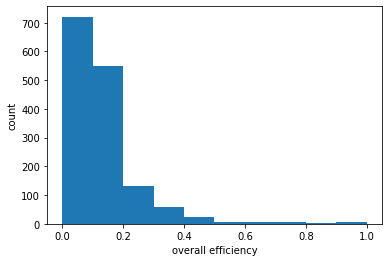

In [9]:
import matplotlib.pyplot as plt

plt.hist(OE, bins = 10, range = (0,1))
plt.xlabel('overall efficiency')
plt.ylabel('count')
plt.show()

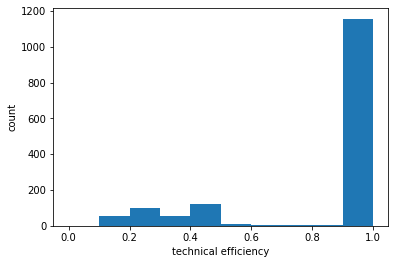

In [10]:
import matplotlib.pyplot as plt

plt.hist(TE, bins = 10, range = (0,1))
plt.xlabel('technical efficiency')
plt.ylabel('count')
plt.show()

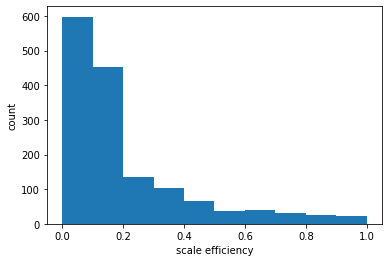

In [11]:
import matplotlib.pyplot as plt

plt.hist(SE, bins = 10, range = (0,1))
plt.xlabel('scale efficiency')
plt.ylabel('count')
plt.show()

## Visualize  DEA efficeincy scores into 4 quadrants

In [ ]:
df = pd.read_csv('data/result.csv').rename(columns={'Unnamed: 0': 'institute'})
df.sort_values(by='overall efficiency', ascending=False)

,institute,overall efficiency,technical efficiency,scale efficiency
502,The University of Queensland,1.000000,1.000000,1.000000
528,Friedrich-Schiller-Universität Jena,1.000000,1.000000,1.000000
916,University of Seville,1.000000,1.000000,1.000000
360,Department of Mathematical Modelling and Optim...,1.000000,1.000000,1.000000
716,University of Osnabrück,0.991181,1.000000,0.991181
...,...,...,...,...
940,Korea University,0.030302,0.249998,0.121209
468,"Zuse Institute Berlin, Takustr. 7, 14195 Berli...",0.029762,0.999996,0.029762
469,"Fakultät für Mathematik, Boltzmannstr., Garchi...",0.029762,0.999996,0.029762
1419,"Karlsruhe Institute of Technology, Discrete Op...",0.029762,0.999996,0.029762


In [ ]:
# df.loc[df['institute']=='National Taiwan University']
df.iloc[360]['institute']

'Department of Mathematical Modelling and Optimal Design, Institute for Mechanical Engineering Problems of the National Academy of Sciences of Ukraine, Pozharsky Str., 2/10, Kharkov 61046, Ukraine'

Text(0.5, 1.0, 'Efficiency Distribution')

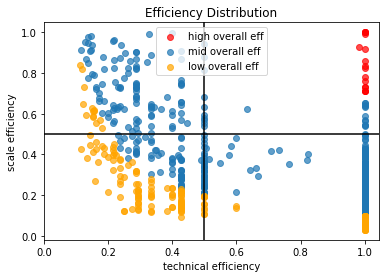

In [ ]:
high_thresh = 0.7
low_thresh = 0.1
high_eff = df.loc[df['overall efficiency'] > high_thresh]
mid_eff = df.loc[df['overall efficiency'] <= high_thresh].loc[df['overall efficiency'] > low_thresh]
low_eff = df.loc[df['overall efficiency'] <= low_thresh]

plt.scatter(high_eff['technical efficiency'], high_eff['scale efficiency'], label='high overall eff', alpha=0.7, color='red')
plt.scatter(mid_eff['technical efficiency'], mid_eff['scale efficiency'], label='mid overall eff', alpha=0.7)
plt.scatter(low_eff['technical efficiency'], low_eff['scale efficiency'], label='low overall eff', alpha=0.7, color='orange')
plt.xlabel('technical efficiency')
plt.ylabel('scale efficiency')
plt.xticks(np.arange(0, 1.01, 0.2))
plt.yticks(np.arange(0, 1.01, 0.2))
plt.axvline(0.5, color='black')
plt.axhline(0.5, color='black')
plt.legend()
plt.title('Efficiency Distribution')